In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']

In [5]:
df.head()

CustomerID  Gender  Age  Income  Spending
0           1    Male   19      15        39
1           2    Male   21      15        81
2           3  Female   20      16         6
3           4  Female   23      16        77
4           5  Female   31      17        40

In [7]:
df.describe()

CustomerID         Age      Income    Spending
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

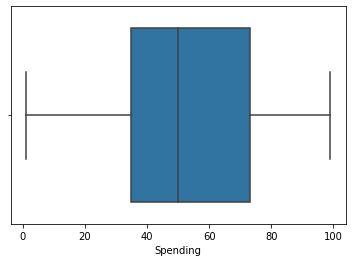

In [8]:
sns.boxplot(x=df["Spending"])

In [9]:
sns.boxplot(x=df["Income"])

In [11]:
df80 = df[df['Income'] > 80]

In [12]:
df80.describe()

CustomerID        Age      Income   Spending
count   38.000000  38.000000   38.000000  38.000000
mean   181.500000  37.157895   98.894737  50.552632
std     11.113055   8.900429   15.156462  33.218928
min    163.000000  19.000000   81.000000   5.000000
25%    172.250000  32.000000   87.000000  17.250000
50%    181.500000  35.500000   97.000000  51.000000
75%    190.750000  41.000000  103.000000  84.500000
max    200.000000  59.000000  137.000000  97.000000

In [15]:
sns.pairplot(df[['Age','Income', 'Spending']])

In [16]:
import sklearn.cluster as cluster

In [21]:
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(df[['Spending','Income']])

In [22]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

In [23]:
df['Clusters'] = kmeans.labels_

In [24]:
df.head()

CustomerID  Gender  Age  Income  Spending  Clusters
0           1    Male   19      15        39         1
1           2    Male   21      15        81         4
2           3  Female   20      16         6         1
3           4  Female   23      16        77         4
4           5  Female   31      17        40         1

In [33]:
df['Clusters'].value_counts()

2    81
0    39
3    35
1    23
4    22
Name: Clusters, dtype: int64

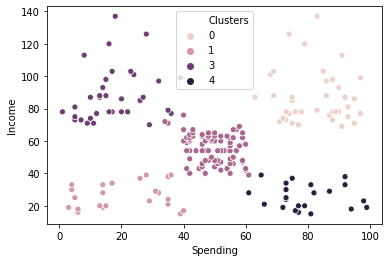

In [28]:
sns.scatterplot(x="Spending", y="Income",hue = 'Clusters',  data=df)
#sns.pairplot(data = df[['Age','Income', 'Spending']], hue ='Clusters' )

In [34]:
dfShort = df[['Age','Income', 'Spending']]

In [38]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(dfShort)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [39]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

Clusters            WSS
0          1  308812.780000
1          2  212840.169821
2          3  143342.751572
3          4  104366.151456
4          5   75350.779172
5          6   58300.443322
6          7   51118.949932
7          8   44309.836404
8          9   41582.633443
9         10   37071.805286
10        11   34856.281039

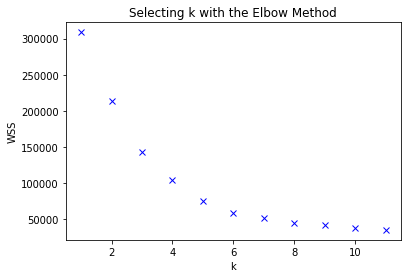

In [40]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [42]:
import sklearn.metrics as metrics

In [44]:
for i in range(5,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dfShort).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dfShort,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 5 is 0.44428597560893024
Silhoutte score for k= 6 is 0.45234439477240534
Silhoutte score for k= 7 is 0.43978902692261157
Silhoutte score for k= 8 is 0.42977587111050725
Silhoutte score for k= 9 is 0.416769489715076
Silhoutte score for k= 10 is 0.3877107538555038
Silhoutte score for k= 11 is 0.3638785076633971
Silhoutte score for k= 12 is 0.3447030670254335


In [45]:
kmeans=cluster.KMeans(n_clusters=6,init="k-means++")
kmeans=kmeans.fit(dfShort)

In [47]:
df['Clusters3'] = kmeans.labels_

In [48]:
df.head()

CustomerID  Gender  Age  Income  Spending  Clusters  Clusters3
0           1    Male   19      15        39         1          0
1           2    Male   21      15        81         4          5
2           3  Female   20      16         6         1          0
3           4  Female   23      16        77         4          5
4           5  Female   31      17        40         1          0

In [50]:
df.groupby('Clusters3').mean()

CustomerID        Age     Income   Spending  Clusters
Clusters3                                                       
0           21.190476  44.142857  25.142857  19.523810  1.000000
1           90.052632  27.000000  56.657895  49.131579  2.026316
2          164.428571  41.685714  88.228571  17.285714  2.971429
3          162.000000  32.692308  86.538462  82.128205  0.000000
4           81.155556  56.155556  53.377778  49.088889  1.955556
5           23.090909  25.272727  25.727273  79.363636  4.000000